## Гистограмма и функция плотности

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.stats import uniform
# равномерное распределение

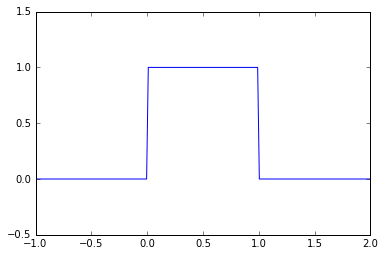

In [3]:
x = np.linspace(-1, 2, 200)
plt.ylim(-0.5, 1.5)
plt.plot(x, uniform.pdf(x))
# uniform.pdf — функция плотности равномерно распределённой случайной величины

In [4]:
uniform.rvs(size=10)
# сгенерировать 10 равномерно распределенных на отрезке [0, 1] чисел

array([ 0.15889147,  0.55288013,  0.7414752 ,  0.52030016,  0.0941665 ,
        0.75761083,  0.53116696,  0.64997991,  0.72975595,  0.66045773])

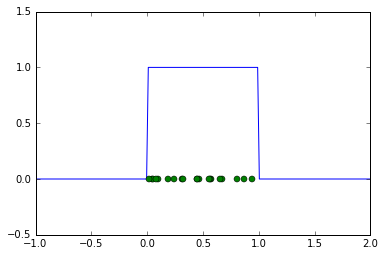

In [5]:
sample = uniform.rvs(size=20)
x = np.linspace(-1, 2, 200)
plt.ylim(-0.5, 1.5)
plt.plot(x, uniform.pdf(x))
plt.plot(sample, np.zeros_like(sample), 'o')
# np.zeroes_like создаёт объект, заполненный нулями, с такими же измерениями, как его аргумент
# в данном случае я хотел создать массив y'ов, такой же по длине, как sample, но заполненный нулями

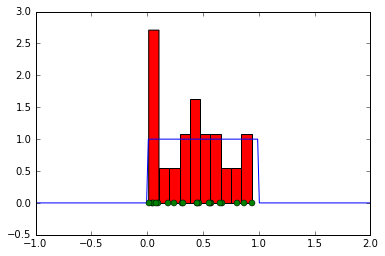

In [6]:
plt.ylim(-0.5, 3)
plt.plot(x, uniform.pdf(x))
plt.plot(sample, np.zeros_like(sample), 'o')
plt.hist(sample, normed=True);
# plt.hist создаёт гистограмму: разбивает горизонтальную ось на отрезочки и над каждым рисует прямоугольник,
# высота которого пропорциональна количеству точек, попавших на отрезок
# подробнее см. https://ru.wikipedia.org/?curid=258610
# параметр normed=True выбирает правильный масштаб на вертикальной оси — такой, что площадь каждого прямоугольника
# равна доле точек, попадающих на соответствующий отрезок

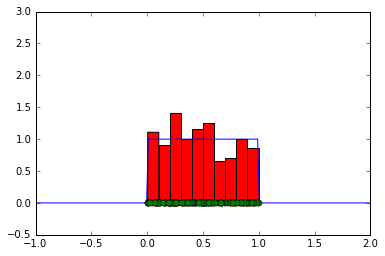

In [7]:
# чем больше размер выборки, тем гистограмма более похожа на график функции плотности 

sample = uniform.rvs(size=200)
x = np.linspace(-1, 2, 200)
plt.ylim(-0.5, 3)
plt.plot(x, uniform.pdf(x))
plt.plot(sample, np.zeros_like(sample), 'o')
plt.hist(sample, normed=True);

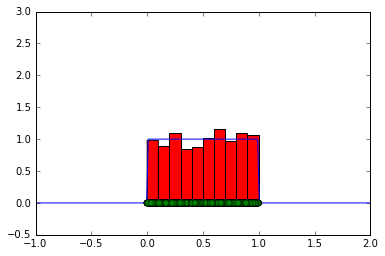

In [8]:
sample = uniform.rvs(size=1000)
x = np.linspace(-1, 2, 200)
plt.ylim(-0.5, 3)
plt.plot(x, uniform.pdf(x))
plt.plot(sample, np.zeros_like(sample), 'o')
plt.hist(sample, normed=True);

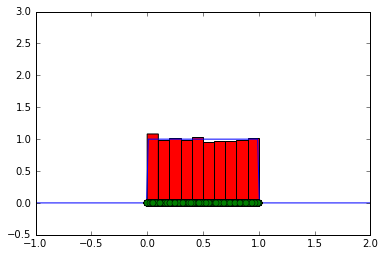

In [9]:
sample = uniform.rvs(size=10000)
x = np.linspace(-1, 2, 200)
plt.ylim(-0.5, 3)
plt.plot(x, uniform.pdf(x))
plt.plot(sample, np.zeros_like(sample), 'o')
plt.hist(sample, normed=True);

In [10]:
# вот пример другой случайной величины

from scipy.stats import chi2

In [11]:
X = chi2(df=5)
# распределение хи-квадрат с пятью степенями свободы

In [12]:
X.rvs(size=10)
# это уже не равномерное распределение: могут встречаться большие числа, но маленькие всё же реже

array([ 2.77612708,  5.90984533,  4.42121135,  2.49136492,  3.5268893 ,
        7.74919171,  4.84524897,  5.14568542,  6.86074216,  1.56598648])

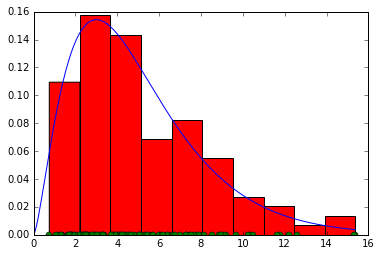

In [13]:
sample = X.rvs(size=100)
x = np.linspace(0, max(sample), 200)
plt.plot(x, X.pdf(x))
plt.plot(sample, np.zeros_like(sample), 'o')
plt.hist(sample, normed=True);

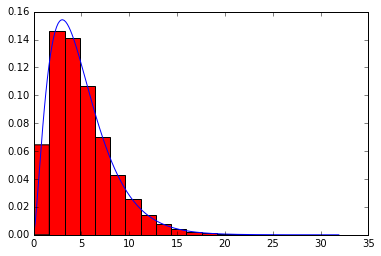

In [14]:
sample = X.rvs(size=100000)
x = np.linspace(0, max(sample), 200)
plt.plot(x, X.pdf(x))
plt.hist(sample, bins=20, normed=True, color='red');

## Закон больших чисел и центральная предельная теорема

In [15]:
from random import choice
# choice выбирает случайный элемент из данных
population = [1, 1, 5, 7]
choice(population)

1

In [16]:
sample_size = 10
sample = [choice(population) for i in range(sample_size)]
np.mean(sample)

4.4000000000000004

In [17]:
np.mean(population)

3.5

In [18]:
# должно было получиться что-то похожее, но на маленьких выборках расстояние между средним по выборке
# и средним по генеральной совокупности (или, что то же самое, математическим ожиданием исходной случайной величины)
# может быть большим

# часто ли так бывает? и что происходит с увеличением размера выборки? 

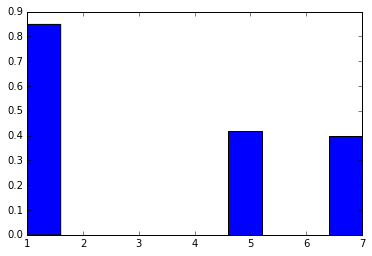

In [19]:
def means_hist(sample_size, samples=1000):
    """создадим 1000 выборок размером sample_size и посчитаем среднее каждой из них"""
    means = []
    # в этот массив будем помещать средние
    for i in range(samples):
        sample = [choice(population) for i in range(sample_size)]
        # сгенерировали очередную выборку

        means.append(np.mean(sample))
        # посчитали выборочное среднее и положили в список
    plt.xlim(min(population), max(population))
    plt.hist(means, normed=True)
means_hist(1)

In [20]:
# на этой картинке нарисованы средние выборок размером в 1 элемент. Гистограмма соответствует распределению элементов
# в population

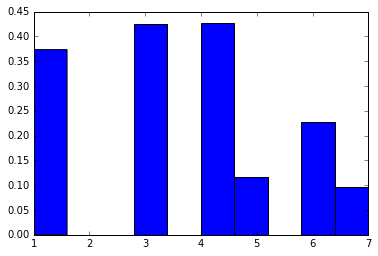

In [21]:
means_hist(2)
# тут появятся промежуточные варианты — например, 3 (среднее для выборок типа [1, 5])

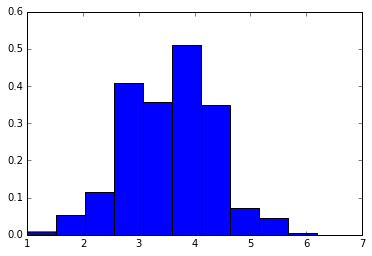

In [22]:
means_hist(10)

In [23]:
# видно, что отклонения от среднего по population (3.5) бывают, но их количество уменьшается с ростом выборки

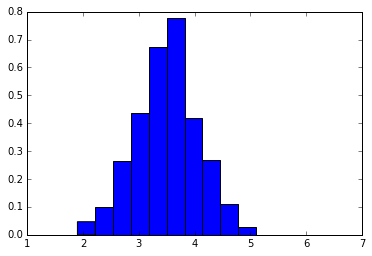

In [24]:
means_hist(20)

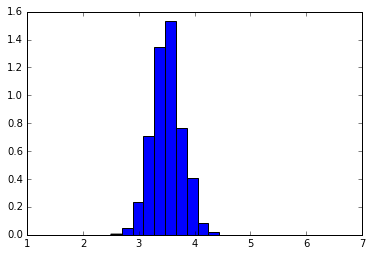

In [25]:
means_hist(100)

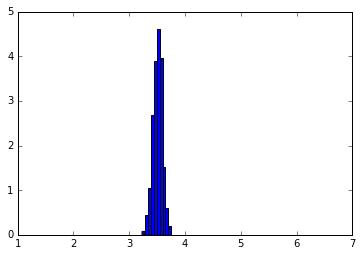

In [26]:
means_hist(1000)

In [27]:
# сильные отклонения от 3.5 всё более редки
# ширина получающегося «колокольчика» пропорциональная 1/sqrt(n)

In [28]:
from scipy.stats import norm

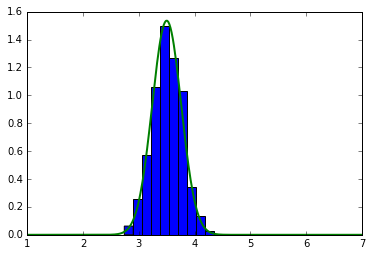

In [29]:
n = 100
means_hist(n)
x = np.linspace(min(population), max(population), 300)
plt.plot(x, norm.pdf(x, loc=np.mean(population), scale=np.std(population)/np.sqrt(n)), lw=2)
# накладываем график плотности нормального распределения с матожиданием, равным среднему по population 

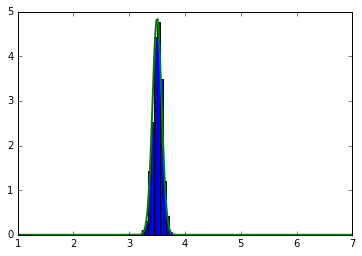

In [30]:
n = 1000
means_hist(n)
x = np.linspace(min(population), max(population), 300)
plt.plot(x, norm.pdf(x, loc=np.mean(population), scale=np.std(population)/np.sqrt(n)), lw=2)

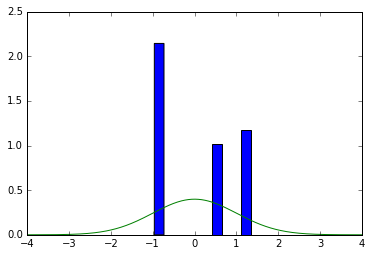

In [31]:
# можно делать наоборот — вместо того, чтобы подгонять график нормального распределения, вытягивать гистограмму
# для этого вместо среднего нужно рисовать гистограмму так называемых z-статистик
def z_hist(sample_size, samples=1000):
    """создадим 1000 выборок размером sample_size и посчитаем среднее каждой из них"""
    zs = []
    # в этот массив будем помещать z-статистики
    for i in range(samples):
        sample = [choice(population) for i in range(sample_size)]
        # сгенерировали очередную выборку
        
        z = (np.mean(sample) - np.mean(population))/np.std(population) * np.sqrt(sample_size)
        zs.append(z)
        # посчитали z-статистику и положили в список
    plt.xlim(-4, 4)
    plt.hist(zs, normed=True)
    x = np.linspace(-4, 4, 400)
    plt.plot(x, norm.pdf(x))
z_hist(1)

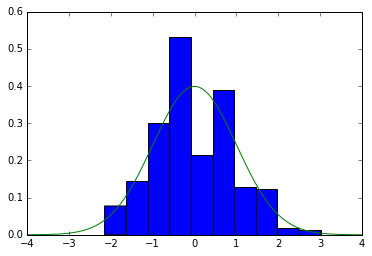

In [32]:
z_hist(5)

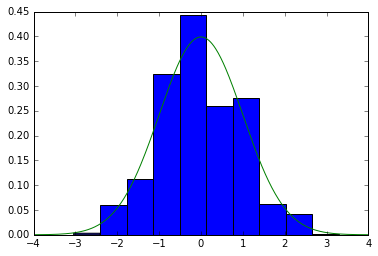

In [33]:
z_hist(10)

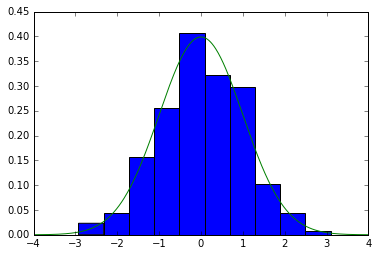

In [34]:
z_hist(20)

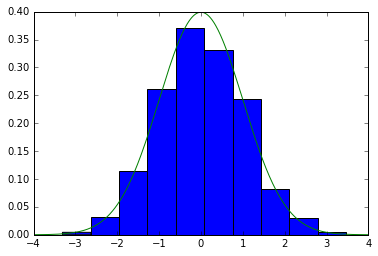

In [35]:
z_hist(100)